In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:

df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [7]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [8]:
df = df.drop(['CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis = 1)
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


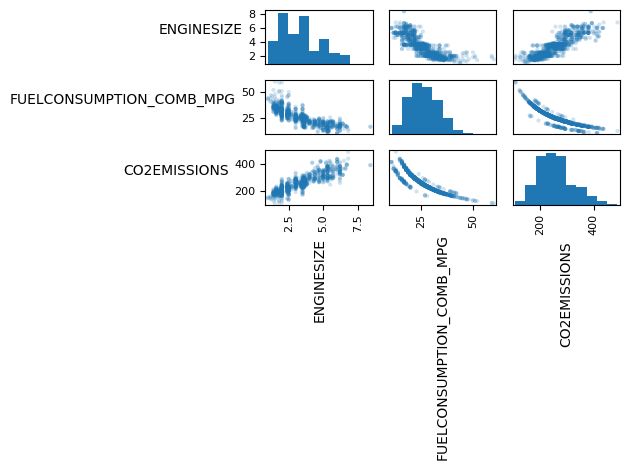

In [9]:
axes = pd.plotting.scatter_matrix(df , alpha = 0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.show()

In [10]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

In [11]:
print(X , " \n\n\n" , y)

[[ 2.  33. ]
 [ 2.4 29. ]
 [ 1.5 48. ]
 ...
 [ 3.  24. ]
 [ 3.2 25. ]
 [ 3.2 22. ]]  


 [[196]
 [221]
 [136]
 ...
 [271]
 [260]
 [294]]


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(X)
x_std

array([[-0.9512918 ,  0.87855306],
       [-0.66865251,  0.34273362],
       [-1.30459092,  2.88787597],
       ...,
       [-0.24469358, -0.32704069],
       [-0.10337393, -0.19308583],
       [-0.10337393, -0.59495041]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train , X_test , y_train , y_test = train_test_split(x_std , y , test_size = 0.2, random_state = 42)

In [16]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train , y_train)

coef = linear_reg.coef_
intercept = linear_reg.intercept_

print("Coeficient : ", coef)
print("Intercept : ", intercept)

Coeficient :  [[ 25.27339614 -37.4381472 ]]
Intercept :  [256.29072488]


In [17]:
mean = std_scaler.mean_
std_dev = np.sqrt(std_scaler.var_)

coef_original = coef / std_dev
intercept_original = intercept - np.sum((mean * coef) / std_dev)

print("Coeficient : ", coef_original)
print("Intercept : ", intercept_original)

Coeficient :  [[17.8581369  -5.01502179]]
Intercept :  [329.1363967]


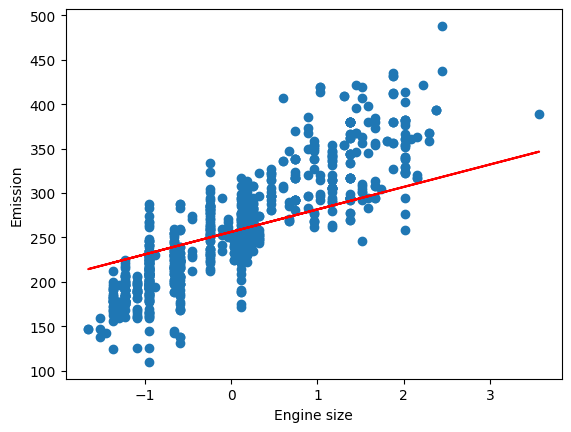

In [18]:
plt.scatter(X_train[:,0] , y_train)
plt.plot(X_train[:,0], coef[0,0] * X_train[:,0] + intercept[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

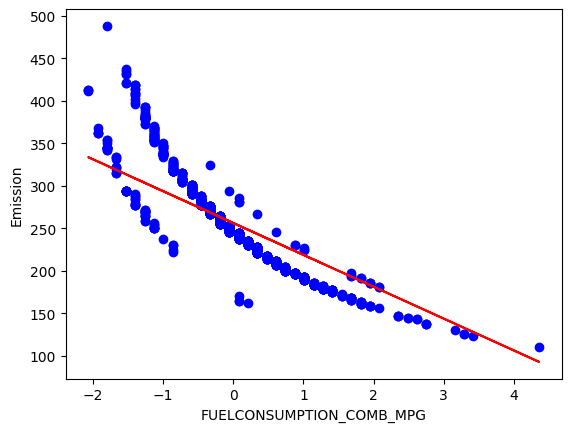

In [20]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef[0,1] * X_train[:,1] + intercept[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()